In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from mutation import *
from crossover import *
from rmp import *
from mfea import *
from task import *
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
gnbg_tasks = []
gnbg_tasks.append(GNBGTask(1))
gnbg_tasks.append(GNBGTask(2))
gnbg_tasks.append(GNBGTask(10))
gnbg_tasks.append(GNBGTask(11))

In [4]:
for gnbg_task in gnbg_tasks:
    print(gnbg_task.gnbg.OptimumValue)

-1081.9837994003399
-703.1328146165181
-604.9748272222274
-118.07535757360006


In [5]:
crossover = BLXCrossover(alpha=0.5)
mutation = AdditiveMutation(bound=100.0, delta=2.0)
rmp = NormalRMP(default_rmp_value=0.3)
num_indis_per_task = 150
indi_len = 30
bound = 100.0
a = AMFEA(num_indis_per_task, indi_len, bound, gnbg_tasks, crossover, mutation, rmp)

Initialization:
Task 0:
Best Fitness: 83783.90062393327
Mean Fitness: 169237.5479071664

Task 1:
Best Fitness: -701.373255153148
Mean Fitness: -701.3089998132323

Task 2:
Best Fitness: 91542.91230424706
Mean Fitness: 220297.876795871

Task 3:
Best Fitness: 110359.82175939788
Mean Fitness: 220195.90981315417



In [6]:
bfs, mfs = a.fit(2000, monitor_rate=200)

Gen 0
Task 0:
Best Fitness: 83783.90062393327
Mean Fitness: 159682.8290033962
Task 1:
Best Fitness: -701.373255153148
Mean Fitness: -701.316407243261
Task 2:
Best Fitness: 91542.91230424706
Mean Fitness: 189448.88950043655
Task 3:
Best Fitness: 110359.82175939788
Mean Fitness: 198943.01800080697
Time taken: 0.04 seconds

Gen 200
Task 0:
Best Fitness: 2524.948974609375
Mean Fitness: 4227.848039284981
Task 1:
Best Fitness: -701.6128409216474
Mean Fitness: -701.6015464290559
Task 2:
Best Fitness: 20649.052734375
Mean Fitness: 22836.23317703143
Task 3:
Best Fitness: 19769.57421875
Mean Fitness: 21835.153387353894
Time taken: 0.01 seconds

Gen 400
Task 0:
Best Fitness: -847.5069353183998
Mean Fitness: -711.9318656078073
Task 1:
Best Fitness: -701.8209838867188
Mean Fitness: -701.7973896534592
Task 2:
Best Fitness: 15152.064453125
Mean Fitness: 16559.07321585157
Task 3:
Best Fitness: 17482.9375
Mean Fitness: 18642.264322629522
Time taken: 0.02 seconds

Gen 600
Task 0:
Best Fitness: -1050.844

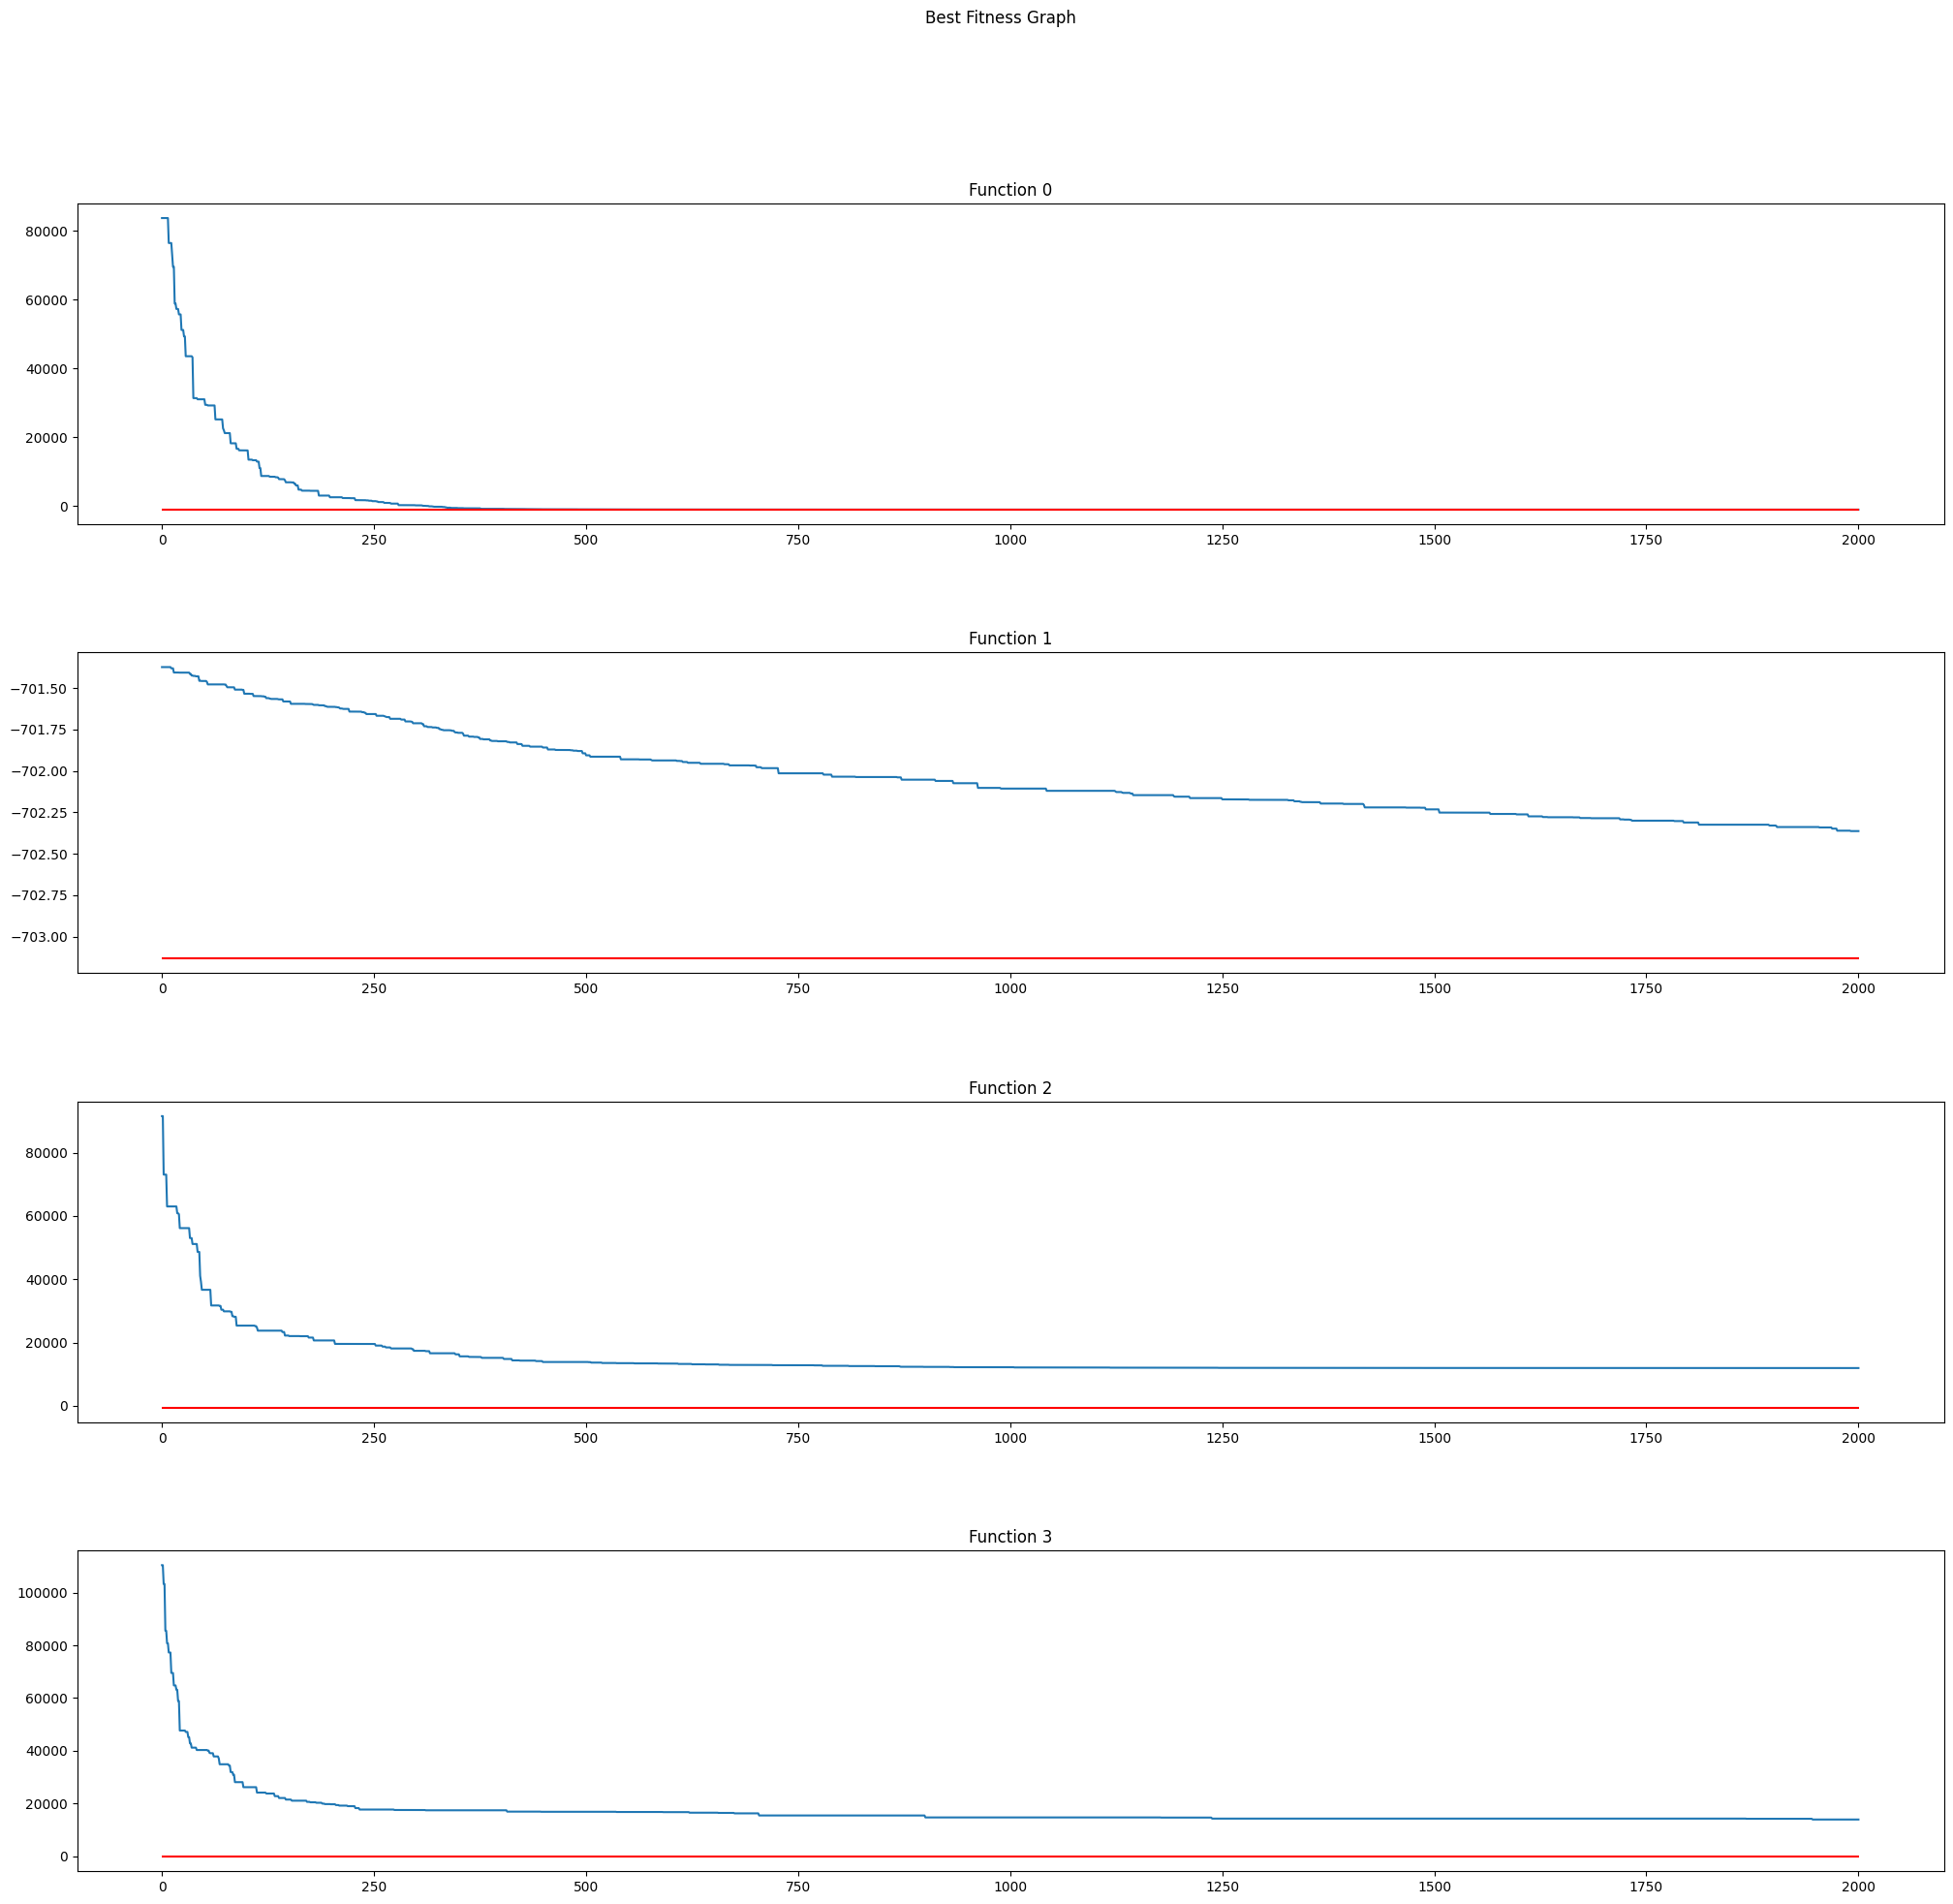

In [ ]:
fig, axes = plt.subplots(4)
fig.set_figwidth(10)
fig.set_figheight(10)
fig.tight_layout()
fig.suptitle("Best Fitness Graph")
fig.subplots_adjust(top=0.88)
plt.subplots_adjust(hspace=0.4)
for i in range(4):
    axes[i].set_title("Function {0}".format(i))
    axes[i].plot(bfs[i])
    axes[i].hlines(gnbg_tasks[i].gnbg.OptimumValue, 0, len(bfs[i]), color="red")

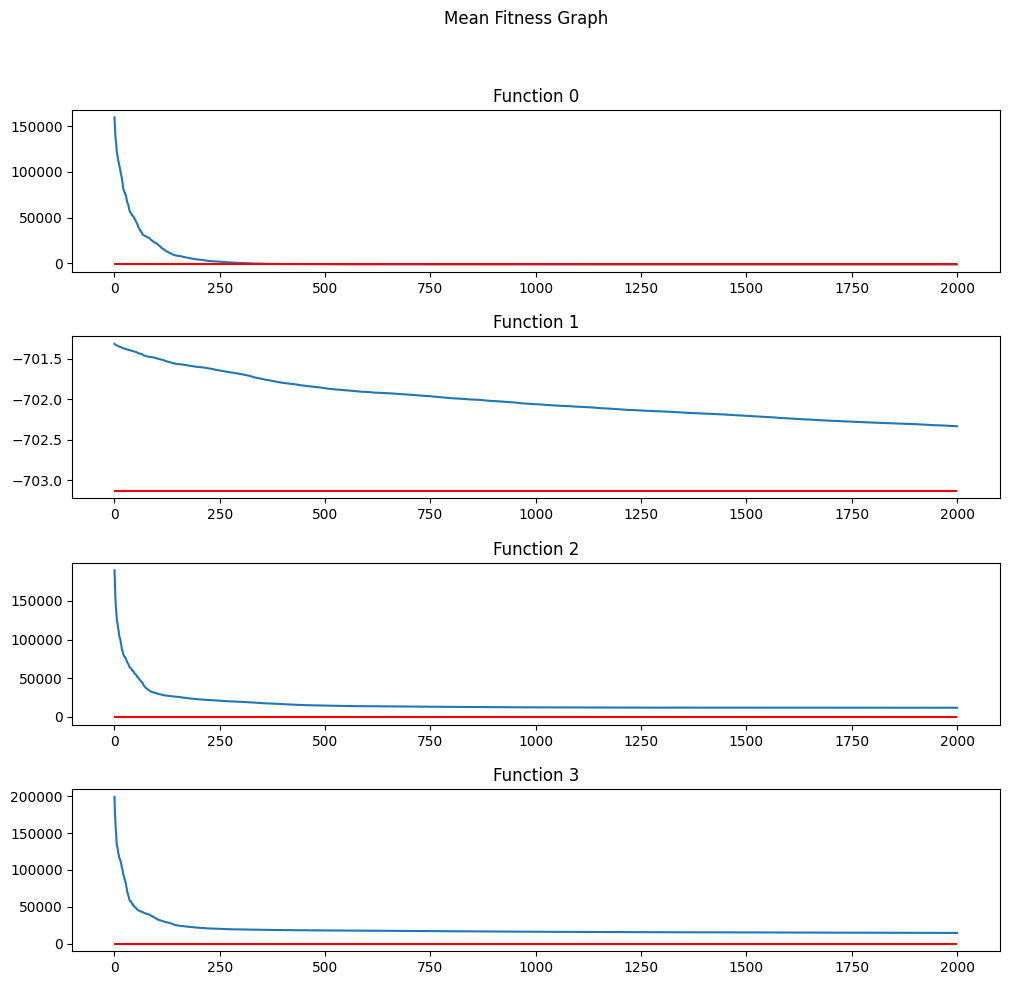

In [37]:
fig, axes = plt.subplots(4)
fig.set_figwidth(10)
fig.set_figheight(10)
fig.tight_layout()
fig.suptitle("Mean Fitness Graph")
fig.subplots_adjust(top=0.88)
plt.subplots_adjust(hspace=0.4)
for i in range(4):
    axes[i].set_title("Function {0}".format(i))
    axes[i].plot(mfs[i])
    axes[i].hlines(gnbg_tasks[i].gnbg.OptimumValue, 0, len(mfs[i]), color="red")

In [9]:
gnbg_task = GNBGTask(2)
x = np.random.uniform(-100, 100, size=30)
gnbg_task.fitness(x)

array([-701.34165583])

In [10]:
np.random.uniform([1, 2, 3, 4], [2, 3, 4, 5], size=4)

array([1.94210951, 2.05008598, 3.76885461, 4.95957432])

In [11]:
low_bounds = np.random.randint(1, 4, size=(4, 4))
high_bounds = low_bounds + 1
np.random.uniform(low_bounds, high_bounds, size=(4, 4))

array([[1.83201662, 1.4293262 , 3.9815342 , 2.27437874],
       [3.4569374 , 1.28936111, 2.94759985, 3.55816185],
       [1.85700024, 3.78918816, 3.06627679, 3.91901731],
       [2.47390757, 1.45666229, 3.66911008, 3.81492445]])